In [6]:
import pandas as pd
data = pd.read_csv("http://digo.ee/internet-2017.csv", na_values="NA", decimal=",", skiprows=1, names=["Регион", "2017"])
data_indexed = pd.Series(data["2017"].values, index=data["Регион"].values)
print (data)
data = data.reset_index()

                       Регион   2017
0        Российская Федерация  14.44
1           БЕЛГОРОДСКАЯ ОБЛ.   9.83
2               БРЯНСКАЯ ОБЛ.  12.46
3           ВЛАДИМИРСКАЯ ОБЛ.  12.38
4           ВОРОНЕЖСКАЯ  ОБЛ.  16.19
..                        ...    ...
87           САХАЛИНСКАЯ ОБЛ.  13.01
88             ЕВРЕЙСКАЯ А.О.  13.29
89             ЧУКОТСКИЙ А.О.   9.48
90  Дальневосточный фед.округ  13.03
91            РЕСПУБЛИКА КРЫМ    NaN

[92 rows x 2 columns]


In [15]:
import pandas as pd
data = pd.read_csv("http://digo.ee/internet-2017.csv", na_values="NA", decimal=",", names=["Регион", "2017"], skiprows=1)
area_indexes = data[data["Регион"].str.contains("округ")].index
data_areas_index = [(lambda n: "AREA" if n in area_indexes else "REGION")(i) for i in range(0, len(data.index))]
data["Тип"] = data_areas_index
data = data.set_index(["Тип", "Регион"])
data = data.sort_index()
areas = data.loc["AREA"]
print (areas)

                              2017
Регион                            
Дальневосточный фед.округ    13.03
Приволжский фед.округ        16.12
Северо-Западный фед.округ    17.52
Северо-Кавказский фед.округ   4.33
Сибирский фед.округ          13.35
Уральский фед.округ          16.89
Центральный фед.округ        15.76
Южный фед.округ              11.10


In [20]:
import pandas as pd
data_2017 = pd.read_csv("http://digo.ee/internet-2017.csv", na_values="NA", decimal=",", names=["Регион", "2017"], skiprows=1, index_col="Регион")
data_2018 = pd.read_csv("http://digo.ee/internet-2018.csv", na_values="NA", decimal=",", names=["Регион", "2018"], skiprows=1, index_col="Регион")
data = pd.merge(data_2017, data_2018, left_index=True, right_index=True)
print (data)

                            2017   2018
Регион                                 
Российская Федерация       14.44  16.53
БЕЛГОРОДСКАЯ ОБЛ.           9.83  11.35
БРЯНСКАЯ ОБЛ.              12.46  12.72
ВЛАДИМИРСКАЯ ОБЛ.          12.38  15.24
ВОРОНЕЖСКАЯ  ОБЛ.          16.19  17.45
...                          ...    ...
САХАЛИНСКАЯ ОБЛ.           13.01  12.69
ЕВРЕЙСКАЯ А.О.             13.29  12.72
ЧУКОТСКИЙ А.О.              9.48  18.05
Дальневосточный фед.округ  13.03  13.47
РЕСПУБЛИКА КРЫМ              NaN    NaN

[92 rows x 2 columns]


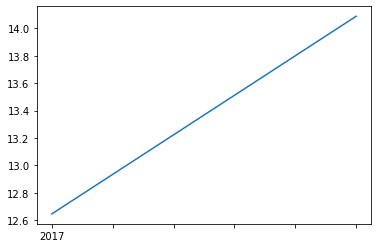

In [21]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
data_2017 = pd.read_csv("http://digo.ee/internet-2017.csv", na_values="NA", decimal=",", names=["Регион", "2017"], skiprows=1, index_col="Регион")
data_2018 = pd.read_csv("http://digo.ee/internet-2018.csv", na_values="NA", decimal=",", names=["Регион", "2018"], skiprows=1, index_col="Регион")
data = pd.merge(data_2017, data_2018, left_index=True, right_index=True)
data.fillna(0, axis=1, inplace=True)
data.mean().plot.line()
plt.show()